Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

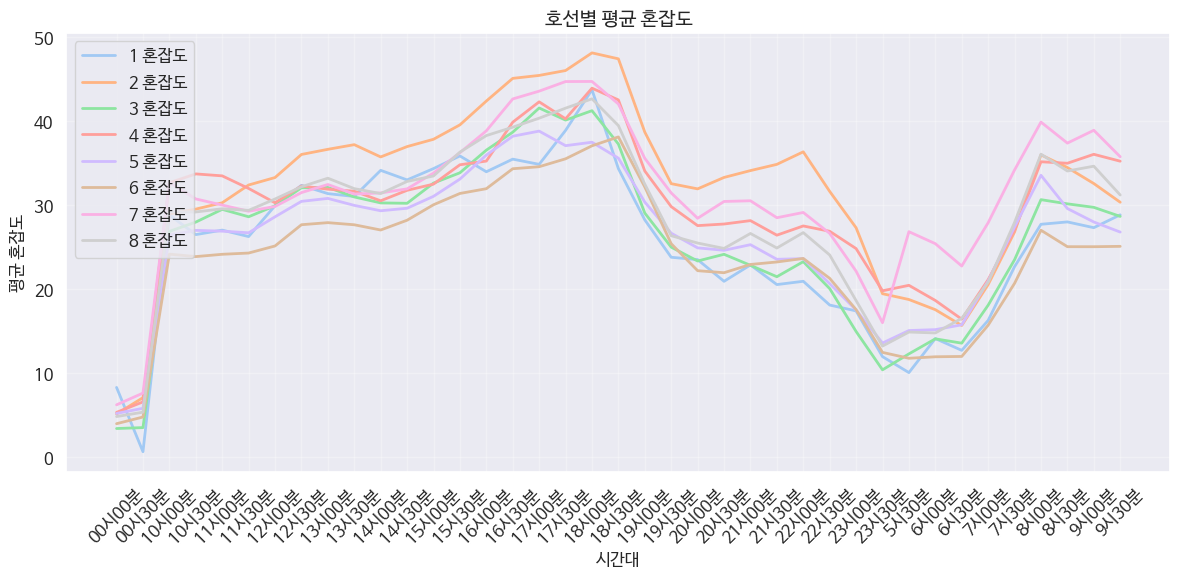

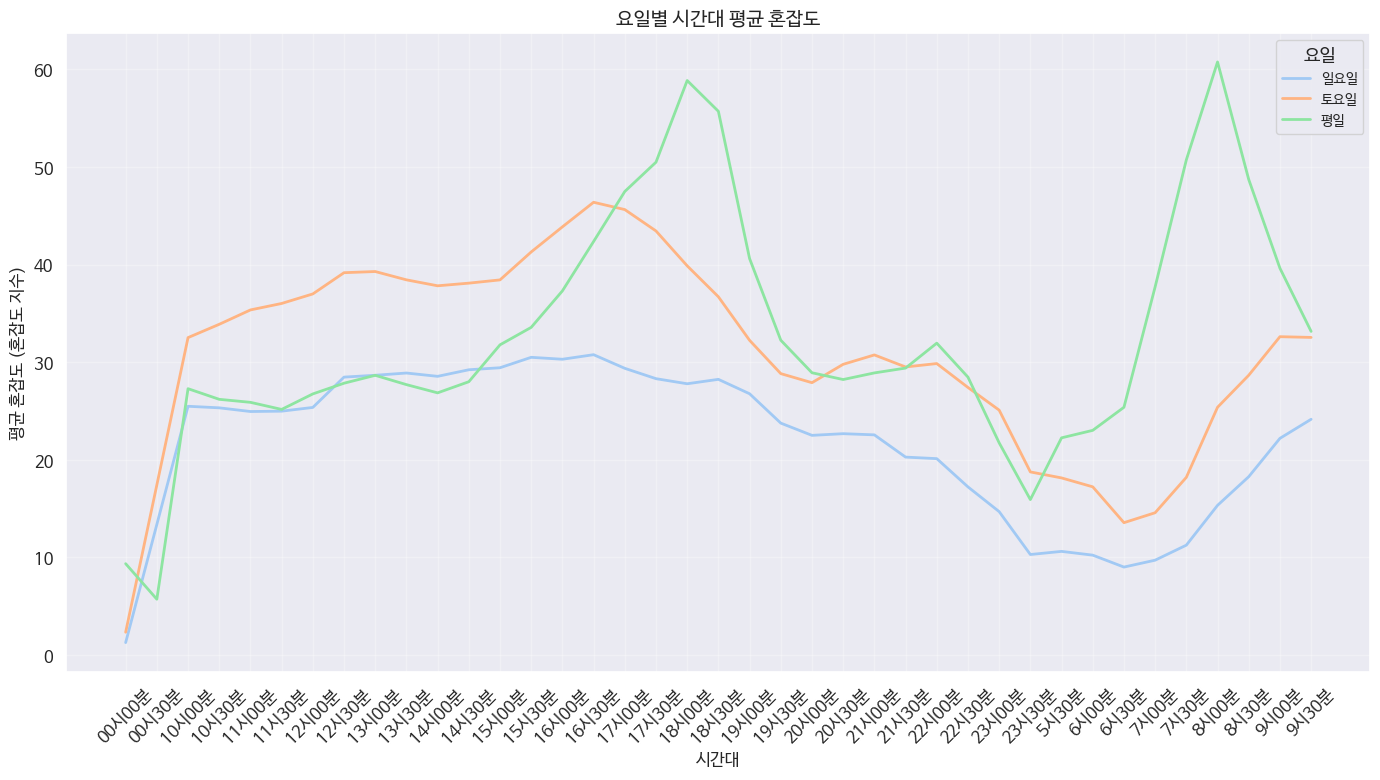


Line Riding Data (Average 승차):
           노선명     평균 승차 인원수
0     4.19민주묘지   3632.838710
1           가능   6448.032258
2         가락시장   8731.500000
3      가산디지털단지  27830.758065
4           가양  20957.064516
..         ...           ...
523         회기  26014.580645
524         회룡  13060.548387
525  회현(남대문시장)  29119.419355
526      효창공원앞   5352.887097
527  흑석(중앙대입구)   9553.741935

[528 rows x 2 columns]

Line Riding Data (Average 하차):
           노선명     평균 하차 인원수
0     4.19민주묘지  2.024103e+07
1           가능  2.024103e+07
2         가락시장  2.024103e+07
3      가산디지털단지  2.024103e+07
4           가양  2.024103e+07
..         ...           ...
523         회기  2.024103e+07
524         회룡  2.024103e+07
525  회현(남대문시장)  2.024103e+07
526      효창공원앞  2.024103e+07
527  흑석(중앙대입구)  2.024103e+07

[528 rows x 2 columns]


<ipython-input-20-91e28600058f>:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_lines, x='노선명', y='평균 승차 인원수', palette='Blues')


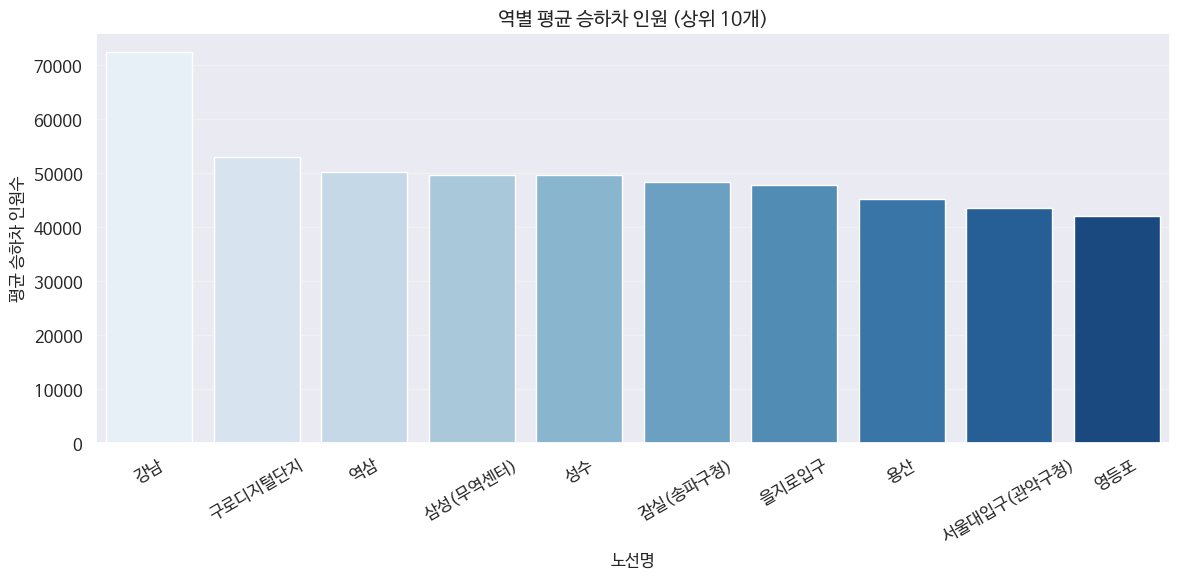

In [ ]:
# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

# 파일 경로 설정
subway_congestion_path = '/content/Subway_Congestion.csv'
subway_riding_path = '/content/Subway_riding.csv'

# 인코딩 탐지 함수
def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
        return result['encoding']

# 인코딩 탐지
congestion_encoding = detect_encoding(subway_congestion_path)
riding_encoding = detect_encoding(subway_riding_path)

# CSV 파일 로드
subway_congestion = pd.read_csv(subway_congestion_path, sep=',', encoding=congestion_encoding)
subway_riding = pd.read_csv(subway_riding_path, sep=',', encoding=riding_encoding)

# 열 이름 공백 제거
subway_congestion.columns = subway_congestion.columns.str.strip()
subway_riding.columns = subway_riding.columns.str.strip()

# Subway Riding 데이터에서 사용일자 변환
subway_riding['사용일자'] = pd.to_datetime(subway_riding['사용일자'].astype(str), format='%Y%m%d', errors='coerce')

# 요일 구분 추가
subway_riding['요일구분'] = subway_riding['사용일자'].dt.day_name().map({
    'Monday': '평일',
    'Tuesday': '평일',
    'Wednesday': '평일',
    'Thursday': '평일',
    'Friday': '평일',
    'Saturday': '토요일',
    'Sunday': '일요일'
})

# NanumBarunGothic 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 그래프 스타일 설정
plt.style.use('ggplot')
sns.set(font='NanumBarunGothic', palette='pastel', font_scale=1.1)  # 한글 지원 폰트 설정

# 시각화 1: 호선별 평균 혼잡도 분석
plt.figure(figsize=(12, 6))

# 각 시간대의 열을 긴 형태로 변환
subway_congestion_melted = subway_congestion.melt(id_vars=['요일구분', '호선', '역번호', '역명', '상하구분'],
                                                    var_name='시간', value_name='혼잡도')

# 호선별 혼잡도 평균 계산
congestion_avg = subway_congestion_melted.groupby(['호선', '시간'])['혼잡도'].mean().reset_index()

# 혼잡도 시각화
for line in congestion_avg['호선'].unique():
    line_congestion = congestion_avg[congestion_avg['호선'] == line]
    plt.plot(line_congestion['시간'], line_congestion['혼잡도'], label=f'{line} 혼잡도', linewidth=2)

plt.legend(loc='upper left')
plt.title('호선별 평균 혼잡도', fontsize=14)
plt.xlabel('시간대', fontsize=12)
plt.ylabel('평균 혼잡도', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()  # 그래프 여백 자동 조정
plt.show()

# 시각화 2: 요일별 시간대 혼잡도 분석
weekday_congestion = subway_congestion_melted.groupby(['요일구분', '시간'])['혼잡도'].mean().reset_index()

# 요일별 혼잡도 시각화
plt.figure(figsize=(14, 8))
sns.lineplot(data=weekday_congestion, x='시간', y='혼잡도', hue='요일구분', linewidth=2)
plt.title('요일별 시간대 평균 혼잡도', fontsize=14)
plt.xlabel('시간대', fontsize=12)
plt.ylabel('평균 혼잡도 (혼잡도 지수)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='요일', loc='upper right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()  # 그래프 여백 자동 조정
plt.show()

# 시각화 3: 호선별 승하차 인원 분석
# Colab에 이미 업로드된 파일 경로를 설정합니다.
subway_riding_path = '/content/Subway_riding.csv'

# 인코딩 탐지 함수
def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
        return result['encoding']

# 인코딩 탐지
riding_encoding = detect_encoding(subway_riding_path)

# CSV 파일 로드
subway_riding = pd.read_csv(subway_riding_path, sep=',', encoding=riding_encoding)

# 열 이름 공백 제거
subway_riding.columns = subway_riding.columns.str.strip()

# 사용일자 변환
subway_riding['사용일자'] = pd.to_datetime(subway_riding['사용일자'].astype(str), format='%Y%m%d', errors='coerce')

# 호선별 승차 총 승객 수 및 평균 승차 인원 계산
line_riding_avg = subway_riding.groupby('노선명')['승차총승객수'].mean().reset_index()
line_riding_avg.rename(columns={'승차총승객수': '평균 승차 인원수'}, inplace=True)

# 호선별 하차 총 승객 수 및 평균 하차 인원 계산
line_riding_hatch_avg = subway_riding.groupby('노선명')['하차총승객수'].mean().reset_index()
line_riding_hatch_avg.rename(columns={'하차총승객수': '평균 하차 인원수'}, inplace=True)

# 데이터 확인
print("\nLine Riding Data (Average 승차):")
print(line_riding_avg)

print("\nLine Riding Data (Average 하차):")
print(line_riding_hatch_avg)

# 승차 인원이 높은 상위 10개 호선만 필터링
top_lines = line_riding_avg.nlargest(10, '평균 승차 인원수')

# 하차 인원이 높은 상위 10개 호선 필터링
bottom_lines = line_riding_hatch_avg.nlargest(10, '평균 하차 인원수')

# 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 그래프 스타일 설정
plt.style.use('ggplot')
sns.set(font='NanumBarunGothic', palette='pastel', font_scale=1.1)

# 역별 평균 승차 인원 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=top_lines, x='노선명', y='평균 승차 인원수', palette='Blues')
plt.title('역별 평균 승하차 인원 (상위 10개)', fontsize=14)
plt.xlabel('노선명', fontsize=12)
plt.ylabel('평균 승하차 인원수', fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
